In [199]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных

In [200]:
users_go = pd.read_csv('C:/Users/Иван/test/6Sprint/users_go.csv')
rides_go = pd.read_csv('C:/Users/Иван/test/6Sprint/rides_go.csv')
subscriptions_go = pd.read_csv('C:/Users/Иван/test/6Sprint/subscriptions_go.csv')

In [201]:
users_go.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [202]:
users_go.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [203]:
rides_go.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [204]:
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [205]:
subscriptions_go.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


# Предобработка данных

## Обработка users_go

In [206]:
users_go.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

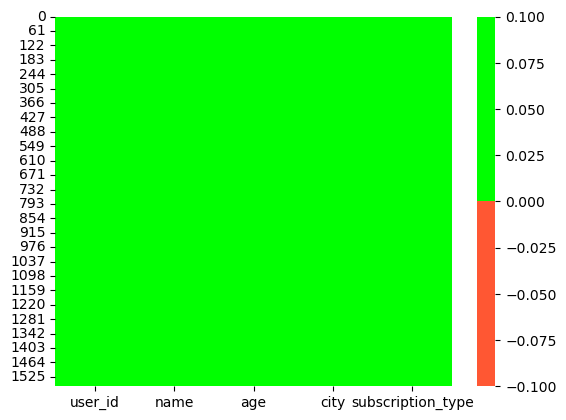

In [207]:
cols = users_go.columns 

#красный для пропущенных данных и зеленый для не пропущенных
colours = ['#FF5733', '#00FF00']
sns.heatmap(users_go[cols].isnull(), cmap=sns.color_palette(colours))
plt.show()

In [208]:
users_go.duplicated().sum()

31

In [209]:
users_go.drop_duplicates(inplace=True)

In [210]:
users_go.duplicated().sum()

0

<AxesSubplot: >

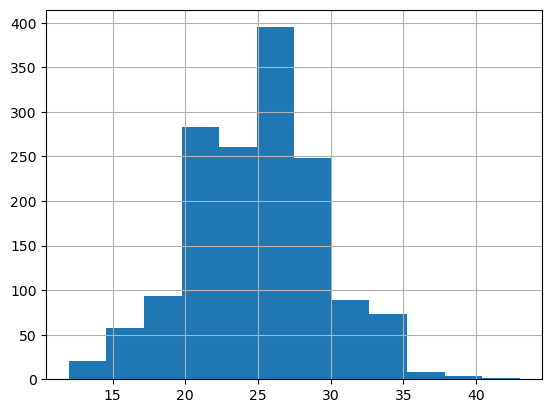

In [211]:
users_go['age'].hist(bins=12)

В датасете users_go обработаны дубликаты. Аномальные выбросы и пропущенные значения отсутсвуют.

## Обработка rides_go

In [212]:
rides_go.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

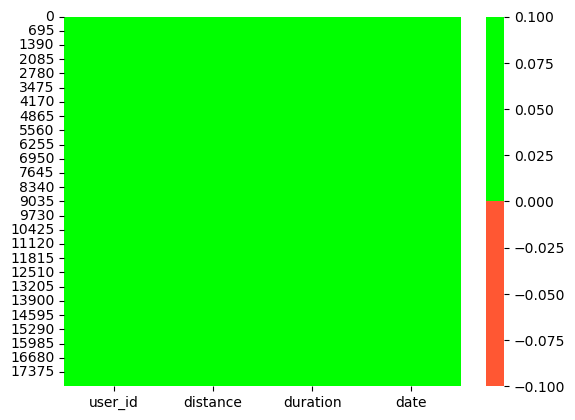

In [213]:
cols = rides_go.columns 

#красный для пропущенных данных и зеленый для не пропущенных
colours = ['#FF5733', '#00FF00']
sns.heatmap(rides_go[cols].isnull(), cmap=sns.color_palette(colours))
plt.show()

In [214]:
rides_go.duplicated().sum()

0

array([[<AxesSubplot: title={'center': 'distance'}>,
        <AxesSubplot: title={'center': 'duration'}>]], dtype=object)

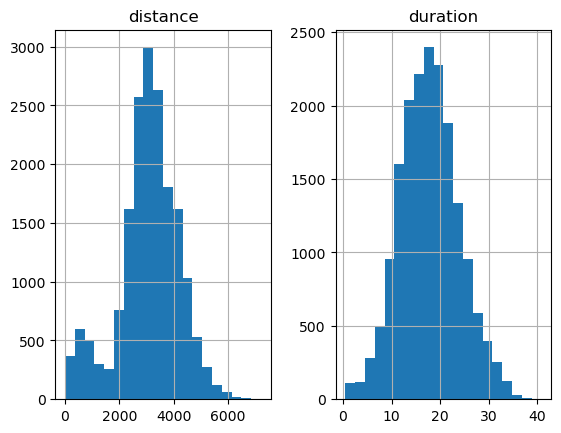

In [215]:
rides_go[['distance', 'duration']].hist(bins=20)

In [216]:
rides_go.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [217]:
rides_go['date'] = pd.to_datetime(rides_go['date'])

In [218]:
rides_go.dtypes

user_id              int64
distance           float64
duration           float64
date        datetime64[ns]
dtype: object

In [219]:
rides_go.corr()

C:\Users\Иван\AppData\Local\Temp\ipykernel_11128\544470720.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rides_go.corr()


,user_id,distance,duration
user_id,1.000000,-0.031249,-0.079940
distance,-0.031249,1.000000,0.536778
duration,-0.079940,0.536778,1.000000


In [220]:
rides_go['distance'] = rides_go['distance'].round(2)
rides_go['duration'] = rides_go['duration'].round(3)

In [221]:
rides_go.head(10)

,user_id,distance,duration,date
0,1,4409.92,25.600,2021-01-01
1,1,2617.59,15.817,2021-01-18
2,1,754.16,6.232,2021-04-20
3,1,2694.78,18.511,2021-08-11
4,1,4028.69,26.266,2021-08-28
5,1,2770.89,16.650,2021-10-09
6,1,3039.02,14.928,2021-10-19
7,1,2842.12,23.117,2021-11-06
8,1,3412.69,15.238,2021-11-14
9,1,748.69,15.042,2021-11-22


# Исследовательский анализ данных


In [222]:
users_go.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [223]:
users_go.city.unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

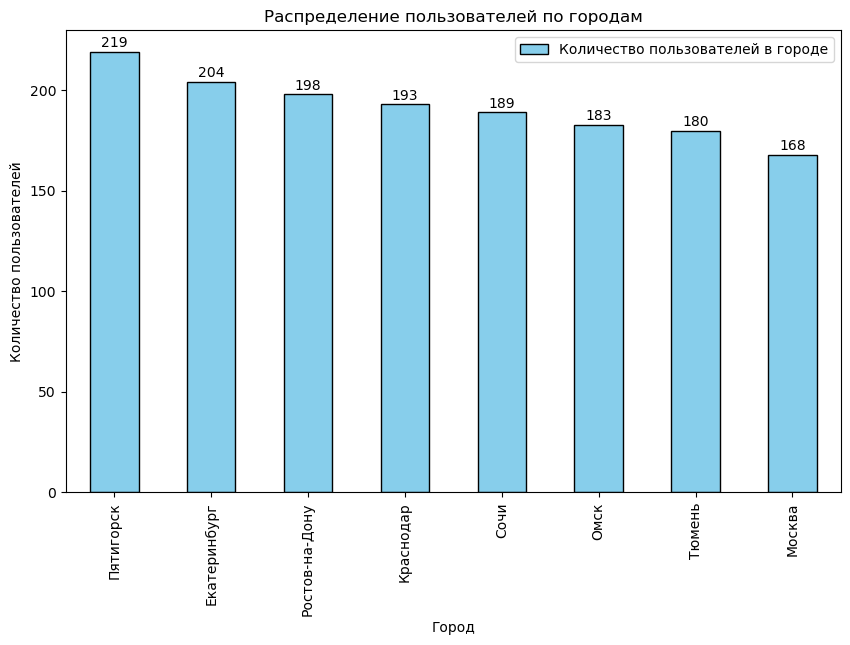

In [224]:
fig, ax = plt.subplots(figsize=(10, 6))

user_counts = users_go['city'].value_counts()
user_counts.plot(kind='bar',ax=ax,color ='skyblue', edgecolor='black')

for i, v in enumerate(user_counts):
    ax.text(i, v + 1 , str(v), ha='center', va='bottom', fontsize=10)

plt.title('Распределение пользователей по городам')
plt.xlabel('Город')
plt.ylabel('Количество пользователей')
ax.legend(['Количество пользователей в городе'])
plt.show()

Самый популярный город - Пятигорск, наименее - Москва.


Text(0.5, 1.0, 'Тип подписки')

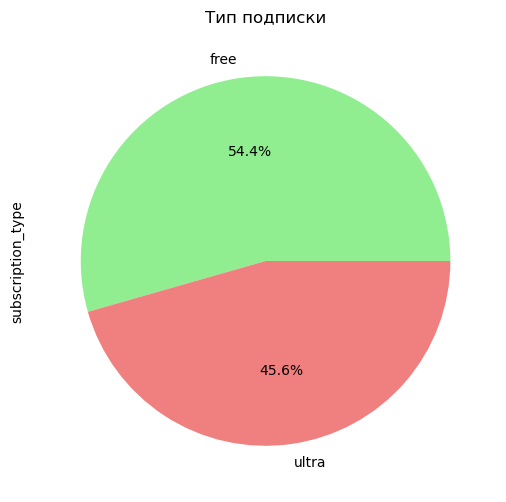

In [225]:
fig, ax = plt.subplots(figsize=(10, 6))

subs_type_perc = (users_go['subscription_type'].value_counts() / users_go.shape[0]) * 100
# subs_type_perc.plot(kind='pie', ax=ax)

colors=['lightgreen', 'lightcoral']

subs_type_perc.plot(kind='pie', ax=ax, autopct='%1.1f%%', colors=colors)
plt.title('Тип подписки')



In [226]:
users_go.age.describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

<AxesSubplot: >

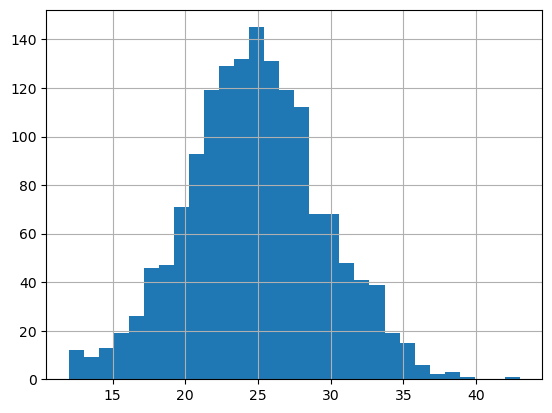

In [227]:
users_go['age'].hist(bins=30)

Средний возраст пользователя - 25 лет, минимальный - 12, а максимальный - 43 года.

In [228]:
rides_go.head()

,user_id,distance,duration,date
0,1,4409.92,25.600,2021-01-01
1,1,2617.59,15.817,2021-01-18
2,1,754.16,6.232,2021-04-20
3,1,2694.78,18.511,2021-08-11
4,1,4028.69,26.266,2021-08-28


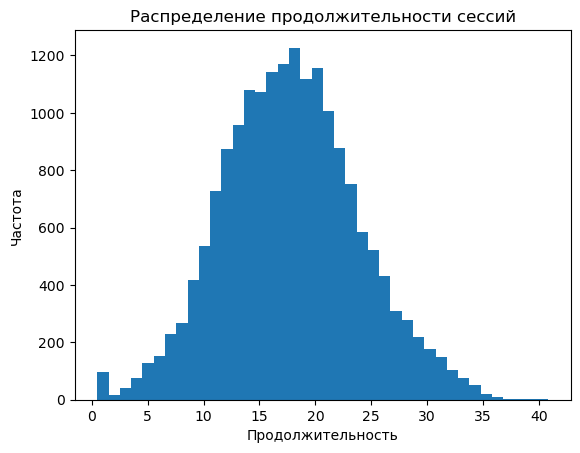

In [238]:
plt.hist(rides_go['duration'], bins=40)
plt.xlabel('Продолжительность')
plt.ylabel('Частота')
plt.title('Распределение продолжительности сессий')
plt.show()

In [230]:
rides_go.duration.describe()

count    18068.000000
mean        17.805010
std          6.091052
min          0.500000
25%         13.597750
50%         17.678500
75%         21.725250
max         40.824000
Name: duration, dtype: float64

In [231]:
rides_go.duration.median()

17.6785

Средняя продолжительность поездки среди пользователей 17.6 минут. При это присутсвуют долгие сессии от 30 минут и выше, так и слишком короткие сессии продолжительностью меньше минуты.

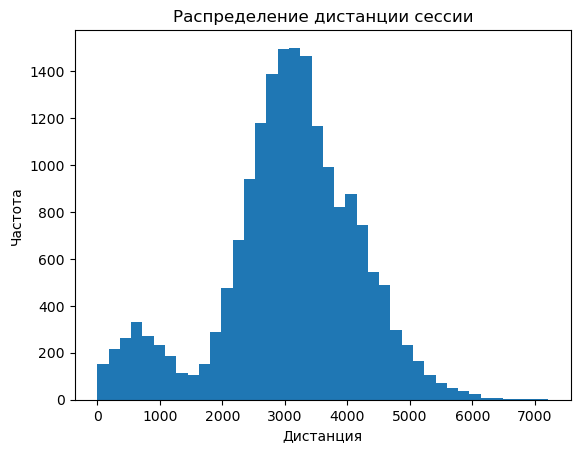

In [239]:
# rides_go.distance.hist(bins=30, figsize=(5,5))
plt.hist(rides_go['distance'], bins=40)
plt.xlabel('Дистанция')
plt.ylabel('Частота')
plt.title('Распределение дистанции сессии')
plt.show()

In [233]:
rides_go.distance.describe()

count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

In [234]:
rides_go.head()

,user_id,distance,duration,date
0,1,4409.92,25.600,2021-01-01
1,1,2617.59,15.817,2021-01-18
2,1,754.16,6.232,2021-04-20
3,1,2694.78,18.511,2021-08-11
4,1,4028.69,26.266,2021-08-28


??????

# Объединение данных